- 힙은 힙의 특성(= 최소 힙에서는 부모가 항상 자식보다 작거나 같다)을 만족하는 특수한 트리 기반 자료구조다.

In [1]:
## 힙(Heap)은 그래프나 트리와는 전혀 관계가 없어 보이는 독특한 이름과 달리, 트리 기반의 자료구조다.
## 앞서 우선순위 큐를 사용할때 매번 활용했던 heapq 모듈이 바로 힙으로 구현되어 있으며, 
## 그중에서도 파이썬에는 최소 힙만 구현되어 있다. 최소 힙은 부모가 항상 자식보다 작기 때문에 
## 루트가 결국 가장 작은 값을 갖게 되며, 우선순위 큐에서 가장 작은 값을 추출하는 것은 매번 힙의 루트를 가져오는 형태로 구현된다.

In [2]:
## 기반 구현을 살펴보면, 우선순위 큐 ADT는 주로 힙으로 구현하고, 힙은 주로 배열로 구현한다.
## 따라서 우선순위 큐는 결국 배열로 구현하는 셈이다.

## 여기서 오해하기 쉬운 것은 힙은 정렬된 구조가 아니라는 점이다.
## 최소 힙의 경우 부모 노드가 항상 작다는 조건만 만족할 뿐, 서로 정렬되어 있지 않다.(BST와 다름)

In [3]:
## 힙이라는 자료구조 자체는 'J.W.J 윌리엄스'라는 영국의 컴퓨터과학자가 1964년 '힙 정렬 알고리즘'을 고안하면서 설계했다.
## 사실상 힙이라는 자료구조는 '힙 정렬'의 부산물인 셈이다.
## 힙은 '완전 이진 트리'이기 때문에 배열에 순서대로 표현하기에 적합하다.
## 47번 '이진 트리의 직렬화 & 역직렬화' 문제에서 살펴본 것처럼 이진 힙의 배열 표현이 가능하며,
## 루트부터 차례로 나열하면 1, 2, 4, ... 순서대로 각 레벨의 노드가 2배씩 증가하는 형태로 배열에 나열할 수 있다.
## '완전 이진 트리'형태인 이진 힙은 배열에 빈틈없이 배치가 가능하며, 
## 대개 트리의 배열 표현의 경우 계산을 편하게 하기 위해 인덱스는 1부터 사용한다.

In [4]:
## 힙은 항상 균형을 유지하는 특징 때문에 다양한 분야에 널리 활용한다. 
## 대표적으로 '우선순위 큐'뿐만 아니라 이를 이용한 '다익스트라 알고리즘'에도 활용된다.
## 힙 덕분에 '다익스트라 알고리즘'의 시간복잡도는 O(V^2)에서 O(ElogV)로 줄어들 수 있었다.

## 이외에도 원래 용도인 '힙 정렬'과 '최소 신장 트리'를 구현하는 '프림 알고리즘' 등에도 활용되며,
## 중앙값의 근사값을 빠르게 구하는 데도 활용할 수 있다.

# 힙 연산

In [5]:
## 그렇다면 실제로 이진 힙을 한번 구현해보자.
## 파이썬의 heapq 모듈에서 지원하는 최소 힙 연산을 여기서는 파이썬의 리스트만으로 동일하게 구현해보자.

In [6]:
## 먼저 이진 힙을 구현하기 위한 클래스 정의부터 진행한다.

In [7]:
class BinaryHeap:
    def __init__(self):
        self.items = [None]
        
    def __len__(self):
        return len(self.items) - 1

In [8]:
## 클래스의 뼈대를 만들고, __len__() 메서드를 정의했다.
## __len__() 처럼 밑줄 2개로 둘러싸인 함수는 파이썬의 매직 메서드로 여러 가지 내부 기능이 동작되는 데 사용된다.
## __len__() 함수에서 실제 길이보다 하나 더 작은 값을 가져오도록 len()의 결과와는 조금 다른 형태로 구현했다.
## 그리고 0번 인덱스는 사용하지 않기 위해 None을 미리 설정해뒀다.

### - 삽입

In [9]:
## 힙에 요소를 삽입하기 위해서는 Up-Heap 연산을 수행해야 한다.
## 일반적으로 Up-Heap 연산은 percolate_up()이라는 함수로 정의한다.

## 힙에 요소를 삽입하는 과정은 다음과 같다.

       1. 요소를 가장 하위 레벨의 최대한 왼쪽으로 삽입한다.(배열로 표현할 경우 가장 마지막에 삽입한다. == append())
       2. 부모 값과 비교해 값이 더 작은 경우 위치를 변경한다.
       3. 계속해서 부모 값과 비교해 위치를 변경한다.(가장 작은 값일 경우 루트까지 올라간다.)

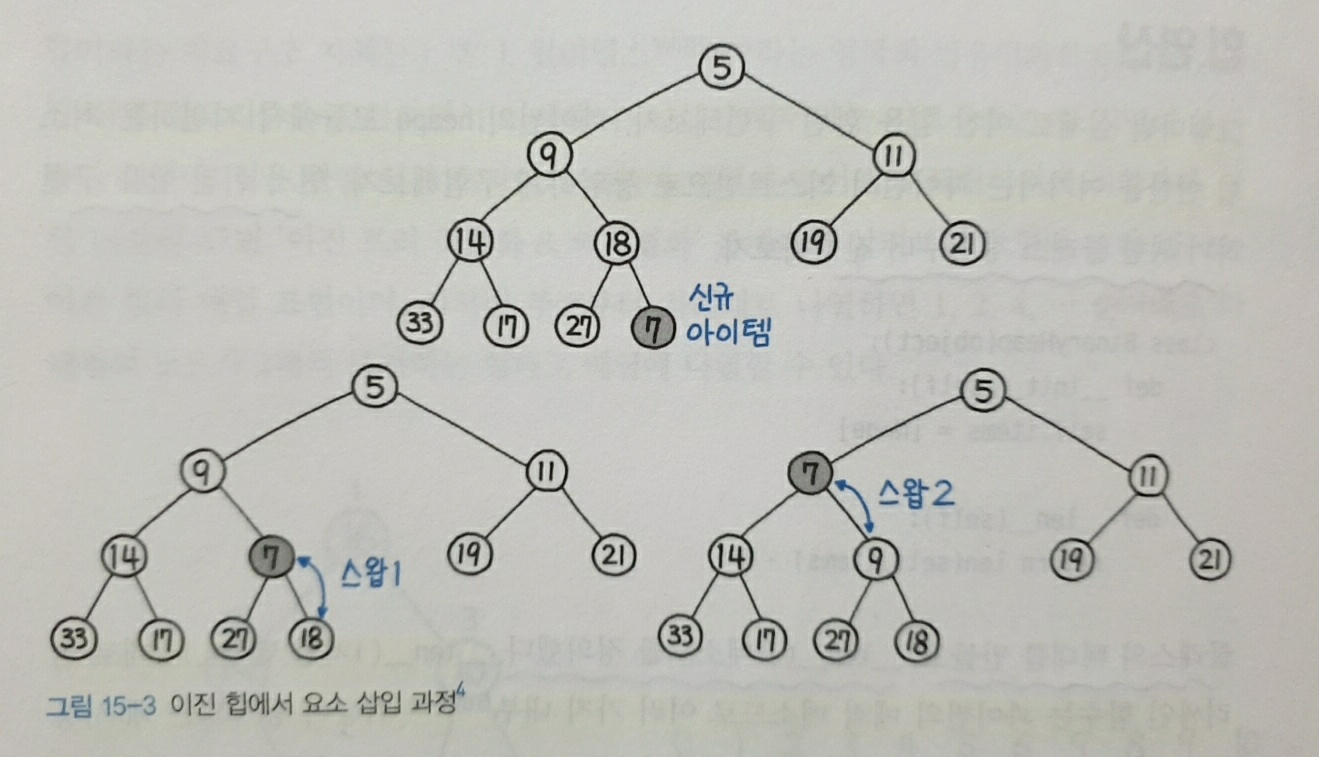

In [10]:
from IPython.display import Image

Image('그림15-3.jpg', width="500", height="300")

In [11]:
## 삽입 과정을 코드로 구현해 보면 다음과 같다. 

In [12]:
def _percolate_up(self):
    i = len(self)
    parent = i // 2
    
    while parent >= 0:
        if self.items[i] < self.items[parent]:
            self.items[parent], self.items[i] = self.items[i], self.items[parent]
        i = parent
        parent = i // 2
        
def insert(self, k):
    self.items.append(k)
    self._percolate_up()
            

In [13]:
## 삽입 자체는 insert() 함수를 호출해 실행된다.
## 코드에서 insert() 함수의 self.items.append()는 1번 과정이고,
## _percolate_up() 함수는 2번, 3번 과정이다.
## 시간 복잡도는 O(logn)이다. parent를 i // 2로 약 절반씩 줄여나가는 형태이므로 로그만큼 연산을 수행하는 것을 알 수 있다.
## _percolate_up() 함수명 앞에 (_)는 PEP8 기준과 관례에 따라 내부 함수라는 의미로 부여했다.

### - 추출

In [14]:
## 추출 자체는 매우 간단하다.
## 루트를 추출하면 된다. 그렇다면 시간 복잡도는 O(1)이라고 생각할 수 있겠지만,
## 추출 이후에 다시 힙의 특성을 유지하는 작업이 필요하기 때문에 O(logn)이 된다.

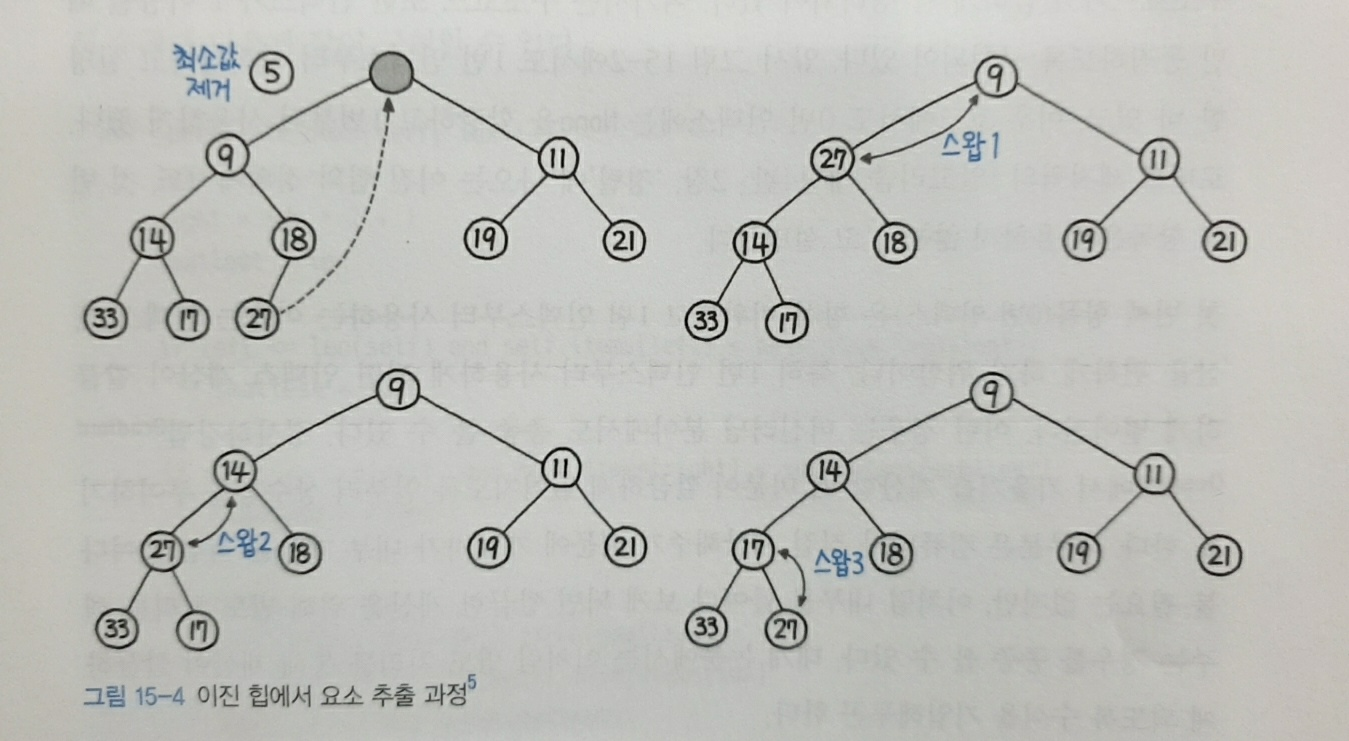

In [15]:
from IPython.display import Image

Image('그림15-4.jpg', width="500", height="300")

In [16]:
## 추출 이후에 비어 있는 루트에는 가장 마지막 요소가 올라가게 되고,
## 이번에는 반대로 자식 노드와 값을 비교해서 자식보다 크면 내려가는 Down-Heap 연산이 수행된다.
## 일반적으로 힙 추출에 많이 쓰이는 percolate_down() 이라는 이름의 함수로 구현해보자.

In [17]:
def _percolate_down(self, idx):
    left = idx * 2
    right = idx * 2 + 1
    smallest = idx
    
    if left <= len(self) and self.items[left] < self.items[smallest]:
        smallest = left
        
    if right <= len(self) and self.items[right] < self.items[smallest]:
        smallest = right
        
    if smallest != idx:
        self.items[idx], self.items[smallest] = self.items[smallest], self.items[idx]
        self._percolate_down(smallest)
        
def extract(self):
    extracted = self.items[1]
    self.items[1] = self.items[len(self)]
    self.items.pop()
    self._percolate_down(1)
    return extracted
    

In [18]:
## 마찬가지로 추출 자체는 extract() 함수로 호출해 실행된다. 
## 이후 루트 값이 추출되고 _percolate_down()이 실행된다.
## 각각 왼쪽과 오른쪽 자식을 비교하고 더 작다면 해당 인덱스로 교체한다.
## 인덱스가 교체되면 서로 값을 스왑하고 다시 재귀 호출한다. 이는 힙의 특성이 유지될 때까지 반복될 것이다.

In [19]:
## 이제 전체 코드는 다음과 같다.

In [20]:
class BinaryHeap:
    
    def __init__(self):
        self.items = [None]
        
        
    def __len__(self):
        return len(self.items) - 1
    
    
    def _percolate_up(self):
        i = len(self)
        parent = i // 2

        while parent >= 0:
            if self.items[i] < self.items[parent]:
                self.items[parent], self.items[i] = self.items[i], self.items[parent]
            i = parent
            parent = i // 2
        
        
    def insert(self, k):
        self.items.append(k)
        self._percolate_up()
        
        
    def _percolate_down(self, idx):
        left = idx * 2
        right = idx * 2 + 1
        smallest = idx

        if left <= len(self) and self.items[left] < self.items[smallest]:
            smallest = left

        if right <= len(self) and self.items[right] < self.items[smallest]:
            smallest = right

        if smallest != idx:
            self.items[idx], self.items[smallest] = self.items[smallest], self.items[idx]
            self._percolate_down(smallest)
            
            
    def extract(self):
        extracted = self.items[1]
        self.items[1] = self.items[len(self)]
        self.items.pop()
        self._percolate_down(1)
        return extracted

In [21]:
## 기존 파이썬 heap 모듈의 heapq.heappush()는 insert()에, heapq.heappop()은 extract()에 대응된다.

In [22]:
## **** 참고 ****

    ## 이진 힙 vs 이진 탐색 트리(BST)
        
        ## 이진 힙과 이진 탐색 트리(BST)의 차이점은 무엇일까?
        ## 가장 직관적인 차이점은, 힙은 상/하 관계를 보장하며, 특히 최소 힙에서는 부모가 항상 자식보다 작다.
        ## 반면, BST는 좌/우 관계를 보장한다. BST에서 부모는 왼쪽 자식보다는 크며, 오른쪽 자식보다는 작거나 같다.
        
        ## 이로 인해 BST는 탐색, 삽입 모두 O(logn)에 가능하며, 모든 값이 정렬되어야 할 때 사용한다.
        ## 반면, 가장 큰 값을 추출하거나 가장 작은 값을 추출하려면 이진 힙을 사용해야 한다. 
        ## 이진 힙은 이 작업이 O(1)에 가능하다. 

In [23]:
## 이진 힙을 직접 구현하는 코딩 테스트 문제는 좀처럼 찾기가 어렵다. 
## 하지만 이진 힙을 활용하는, 특히 우선순위 큐를 활용하는 문제는 이전에도 많이 풀어봤고 앞으로도 계속 풀어보게 될 것이다.

# 55. 배열의 k번째 큰 요소

### LeetCode 215. Kth Largest Element in an Array

##### 정렬되지 않은 배열에서 k번째 큰 요소를 추출하라

In [24]:
## 예제 1
    ## input: [3, 2, 3, 1, 2, 4, 5, 5, 6], k = 4
    ## output: 4

##### 풀이 1 heapq 모듈 이용

In [25]:
## 11장의 31번 문제 '상위 K 빈도 요소'와 비슷한 문제다.
## 다른 점이라면 가장 큰 값이냐, 가장 빈번한 값이냐의 차이 정도라 하겠다.

In [26]:
from typing import *
import heapq

def findKthLargest(nums: List[int], k: int) -> int:
    heap = list()
    
    for n in nums:
        heapq.heappush(heap, -n)
    
    for _ in range(k - 1):
        heapq.heappop(heap)
        
    return -heapq.heappop(heap)

In [27]:
nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

findKthLargest(nums, k)

4

In [28]:
## 파이썬 heapq 모듈은 최소 힙만 지원하므로, 음수로 저장한 다음 가장 낮은 값부터 추출해 부호를 변환하면
## 최대 힙처럼 동작하도록 구현할 수 있다.

##### 풀이 2 heapq 모듈의 heapify 이용

In [29]:
## 모든 값을 꺼내서 Push 하지 않고도 한 번에 heapify()하여 처리할 수 있다.
## heapify()란 주어진 자료구조가 힙 특성을 만족하도록 바꿔주는 연산이며, 
## 이 경우 파이썬의 일반적인 리스트는 힙 특성을 만족하는 리스트로, 값의 위치가 변경된다.

## 물론 하나라도 값을 추가하면 다시 힙 특성이 깨지지만, 추가가 계속 일어나는 형태가 아니기 때문에 heapify()는 한 번만 하면 충분하다.

In [30]:
def findKthLargest(nums: List[int], k: int) -> int:
    heapq.heapify(nums)
    
    for _ in range(len(nums) - k):
        heapq.heappop(nums)
        
    return heapq.heappop(nums)

In [31]:
nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

findKthLargest(nums, k)

4

##### 풀이 3 heapq 모듈의 nlargest 이용

In [32]:
## heapq 모듈은 강력한 기능을 많이 지원한다.
## 그중에는 n번째 큰 값을 추출하는 기능도 있다.
## 이 기능을 사용하면, 전체 코드를 한 줄로 처리할 수 있다.

In [33]:
def findKthLargest(nums: List[int], k: int) -> int:
    return heapq.nlargest(k, nums)[-1]

In [34]:
nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

findKthLargest(nums, k)

4

In [35]:
## 가장 큰 값부터 k번째만큼 큰 값까지 순서대로 리스트로 리턴된다.
## 여기서 마지막 -1이 k번째 값이 된다.

## 참고로 nsmallest()를 사용하면 동일한 방식으로 n번째 작은 값도 추출이 가능하다.

##### 풀이 4 정렬을 이용한 풀이

In [36]:
## 이번에는 정렬부터 한 다음, k번째 값을 추출하는 방식으로 풀어본다.
## 추가, 삭제가 빈번할 때는 heapq를 이용한 힙 정렬이 유용하지만, 
## 이처럼 입력값이 고정되어 있을 때는 그저 한 번 정렬하는 것만으로 충분하다.

In [37]:
def findKthLargest(nums: List[int], k: int) -> int:
    return sorted(nums, reverse=True)[k - 1]

In [38]:
nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

findKthLargest(nums, k)

4

In [39]:
## 모든 방식은 실행 속도에 큰 차이가 없으나 '정렬' 방식이 가장 빠르다. 
## 파이썬의 정렬 함수는 팀소트(Timsort)를 사용하며 C로 매우 정교하게 구현되어 있기 때문에, 
## 대부분의 경우에는 파이썬의 내부 정렬 함수를 사용하는 편이 가장 성능이 좋다.